In [21]:
from matplotlib.colors import LightSource
def display_surface_matplotlib(z, albedo=None):
    """
    Same as above but using matplotlib instead. It is passed but unused, just for
    keeping the same signature as the mayavi based function...
    """
    if albedo is not None:
        print("albedo mapping is not implemented yet...")
    m, n = z.shape
    x, y = np.mgrid[0:m, 0:n]
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ls = LightSource(azdeg=-60, altdeg=25.0)
    greyvals = ls.shade(z, plt.cm.Greys)
    ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, antialiased=False, facecolors=greyvals)
    # not implemented yet!
    # plt.axis('equal')
    plt.show()

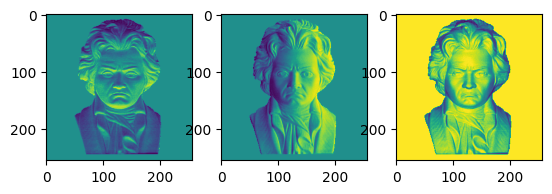

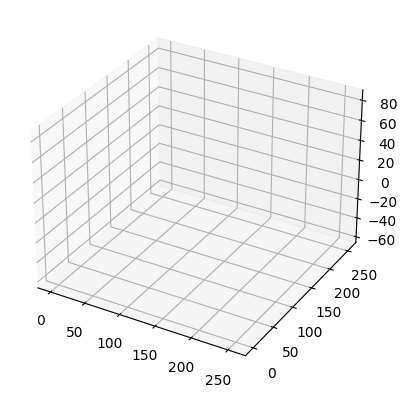

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [39]:
import numpy as np
import ps_utils
import numpy.linalg as la
import matplotlib.pyplot as plt

# read Beethoven data
I, mask, S = ps_utils.read_data_file('Beethoven')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

flat_mask = mask.flatten()
Is = []
for i in range(3):
    Is.append(I[:,:,i].flatten())
    
stacked_I = np.vstack(masked_Is)

J = stacked_I[:,flat_mask > 0] 

M = np.dot(la.inv(S), J)

# The part bellow is not mine

#get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))

n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
display_surface_matplotlib(z)


z

In [40]:
!git status

On branch vojta
Your branch is ahead of 'origin/vojta' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../Untitled.ipynb
	modified:   assignement_3.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	__pycache__/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add assignement_3.ipynb